# Calculate the statistics of differnet kinds of defectss

Based on the `csv` files generated by two steps fitting here we will get the statistics of all the defects and shwo some figures related with the defects radius and area density

In [11]:
# Results Path
import os
# Import packages
import re

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

os.getcwd()

'/Users/mingrenshen/Projects/multitype-defect-detection'

In [2]:
os.chdir('..')

In [6]:
dict_ID2ImgName = {'11': 'grid1_roi2_500kx_0p5nm_haadf1_0047', '10': 'grid1_roi1_500kx_0p5nm_haadf1_0025', '1': '0501_300kx_1nm_clhaadf3_0014', '0': '0501_300kx_1nm_clhaadf3_0010', '3': '200kV_500kx_p2nm_8cmCL_grain1_0056 - Copy', '2': '1ROI_100kx_4100CL_foil1', '5': '5401_300kx_1nm_clhaadf3_0020', '4': '200kV_500kx_p2nm_8cmCL_grain2_0036', '7': 'BF X500K, 06 (2)', '6': '8ROI_100kx_4100CL_foil1', '9': 'g2_midonzone_GBtowardsfront_0010', '8': 'g1_backonzone_GBtowardsfrom_0007'}

In [12]:
# Reff statistics in nm

Reff111 = list()
ReffBD = list()
Reff100 = list()

datPath = "./FittingFunctions/outputFitting0p05/"

# Loop through all the 

In [6]:
for imgID in range(12):
    print("Now process image %d" % imgID)
    currentResult = pd.read_csv(datPath+"results_"+str(imgID)+".csv")
    for index,row in currentResult.iterrows():
        if currentResult.at[index,'class'] == 0: # 111
            Reff111.append( 2* currentResult.loc[index,"Reff_nm"])
        elif currentResult.at[index,'class'] == 1: # Black Dot
            ReffBD.append( 2 * currentResult.at[index,"Reff_nm"])
        else:
            # 100
            assert( currentResult.at[index,'class'] == 2)
            Reff100.append(2 * currentResult.at[index,"Reff_nm"])
print('Done')

Now process image 0
Now process image 1
Now process image 2
Now process image 3
Now process image 4
Now process image 5
Now process image 6
Now process image 7
Now process image 8
Now process image 9
Now process image 10
Now process image 11
Done


In [7]:
print('The average effective radius of 111 is %f'%(np.average(Reff111)))
print('The average effective radius of BlackDots is %f'%(np.average(ReffBD)))
print('The average effective radius of 100 is %f'%(np.average(Reff100)))

#Calculate SEM
print('The SEM radius of 111 is %f'%(np.std(Reff111)/np.sqrt(len(Reff111))))
print('The SEM radius of BlackDots is %f'%(np.std(ReffBD)/np.sqrt(len(ReffBD))))
print('The SEM radius of 100 is %f'%(np.std(Reff100)/np.sqrt(len(Reff100))))

The average effective radius of 111 is 23.114769
The average effective radius of BlackDots is 9.100260
The average effective radius of 100 is 22.355503
The SEM radius of 111 is 0.760317
The SEM radius of BlackDots is 0.189114
The SEM radius of 100 is 0.918588


In [14]:
# Import Package
import os
import cv2

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# calculate density of defects
#dataset_val = MultiDefectDetectionDataset(data_dir='./data/3Types/Data3TypesYminXminYmaxXmax9', split='validation2')
# pix2nm is the dict that stores all the coefficient to convert pixel value to real nm data
# The format is { 'img_name' :  [pixelNum,nmNum]}
# in total the full name of all 12 testing images should be here
# pix2nm is the dict that stores all the coefficient to convert pixel value to real nm data
# The format is { 'img_name' :  [pixelNum,nmNum]}
# in total the full name of all 12 testing images should be here
pix2nm = {'0501_300kx_1nm_clhaadf3_0010_results.csv' : [1024, 490],
          '0501_300kx_1nm_clhaadf3_0014_results.csv' : [1024, 490],
          '1ROI_100kx_4100CL_foil1_results.csv' : [1024, 890],
          '200kV_500kx_p2nm_8cmCL_grain1_0056 - Copy_results.csv' : [1024, 290], #[1024, 291.248],
          '200kV_500kx_p2nm_8cmCL_grain2_0036_results.csv' : [1024, 490],#[1024, 485.413],
          '5401_300kx_1nm_clhaadf3_0020_results.csv' : [1024, 490],
          '8ROI_100kx_4100CL_foil1_results.csv' : [1024, 890],
          'BF X500K, 06 (2)_results.csv' : [1024, 145],
          'g1_backonzone_GBtowardsfrom_0007_results.csv' : [2048, 290], #[2048, 291.248],
          'g2_midonzone_GBtowardsfront_0010_results.csv' : [2048, 290], #[2048, 291.248],
          'grid1_roi1_500kx_0p5nm_haadf1_0025_results.csv' : [1024, 290],
          'grid1_roi2_500kx_0p5nm_haadf1_0047_results.csv': [1024, 290]}
# Storing all needed information
# all following the rules that 
# 0 for 111
# 1 for black dot
# 2 for 100
allDefectsDensity = [[],[],[]]
allArea = 0
allNum111 = 0
allNum100 = 0
allNumBD = 0 
for i in range(12):
    current_img_name = dict_ID2ImgName[str(i)]
    current_conversionFactor = 1.0 * pix2nm[current_img_name+'_results.csv'][1] / pix2nm[current_img_name+'_results.csv'][0] # nm / pixel
    current_area = pix2nm[current_img_name+'_results.csv'][1] * pix2nm[current_img_name+'_results.csv'][1] # nm^2
    allArea += current_area
    current_num111 = 0 # class 0
    current_numBD = 0  # class 1
    current_num100 = 0 # class 2
    current_csv = pd.read_csv(datPath + "results_" + str(i) + '.csv')
    for idx, row in current_csv.iterrows():
        # 111 LOOP
        if (current_csv.at[idx, 'class'] == 0):
            #allDefectsReff[0].append(current_csv.at[idx, 'Major'] * current_conversionFactor)
            current_num111 += 1
            # Black Dot
        if (current_csv.at[idx, 'class'] == 1):
            #tmpReff = np.sqrt(current_csv.at[idx, 'Major'] * current_csv.at[idx, 'Minor'] )
            #allDefectsReff[1].append( tmpReff * current_conversionFactor)
            current_numBD += 1
        # 100 Loop
        if (current_csv.at[idx, 'class'] == 2):
            #allDefectsReff[2].append(current_csv.at[idx, 'Major'] * current_conversionFactor)
            current_num100 += 1
    # get the density data
    allNum111 += current_num111
    allNum100 += current_num100
    allNumBD += current_numBD
    allDefectsDensity[0].append(1.0 * current_num111/current_area)
    allDefectsDensity[1].append(1.0 * current_numBD/current_area)
    allDefectsDensity[2].append(1.0 * current_num100/current_area)
print("new areal density")
print('111 %f'%(1.0*allNum111/allArea))
print('100 %f'%(1.0*allNum100/allArea))
print('black dot %f'%(1.0*allNumBD/allArea))

new areal density
111 0.000110
100 0.000090
black dot 0.000217


In [9]:
# Density Information
# Output Summary Information
print('111 Loop Information \n mean density %f \n std density %f' % (np.mean(allDefectsDensity[0]), np.std(allDefectsDensity[0])))
# Output Summary Information
print('Black Dot Information \n mean density %f \n std density %f' % (np.mean(allDefectsDensity[1]), np.std(allDefectsDensity[1])))
# Output Summary Information
print('100 Loop Information \n mean density %f \n std density %f' % ( np.mean(allDefectsDensity[2]), np.std(allDefectsDensity[2])))

111 Loop Information 
 mean density 0.000221 
 std density 0.000226
Black Dot Information 
 mean density 0.000489 
 std density 0.000506
100 Loop Information 
 mean density 0.000179 
 std density 0.000170


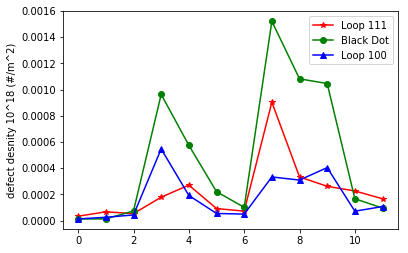

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot Loop Density
plt.plot(allDefectsDensity[0], marker = '*',color='red', label='Loop 111')
plt.plot(allDefectsDensity[1], marker = 'o',color='green', label='Black Dot')
plt.plot(allDefectsDensity[2], marker = '^',color='blue', label='Loop 100')
plt.legend()
plt.ylabel("defect desnity 10^18 (#/m^2)")
plt.show()
plt.savefig('machine_density.png',dpi=300)

/Users/mingrenshen/anaconda3/envs/chainercv/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


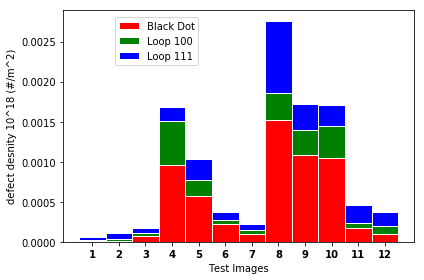

In [11]:
# Stack Plot of Loop Density
# Heights of bars
fig, axs = plt.subplots(1, 1, tight_layout=True)
bars = np.add(allDefectsDensity[1] , allDefectsDensity[2] ).tolist()
barWidth = 1

# Names of group and bar width
names = ['1','2','3','4','5','6','7','8','9','10','11','12']

imgId = [0,1,2,3,4,5,6,7,8,9,10,11] # The position of the bars on the x-axis

# Black Dot (bottom)
plt.bar(imgId, allDefectsDensity[1], color='red', edgecolor='white', width=barWidth, label='Black Dot')
# Loop 100
plt.bar(imgId , allDefectsDensity[2], bottom=allDefectsDensity[1], color='green', edgecolor='white', width=barWidth, label='Loop 100')
# Loop 111 (top)
plt.bar(imgId , allDefectsDensity[0], bottom = bars , color='blue', edgecolor='white', width=barWidth, label='Loop 111')
 
# Custom X axis
plt.xticks(imgId , names, fontweight='bold')
plt.xlabel("Test Images")
plt.ylabel("defect desnity 10^18 (#/m^2)")
plt.legend(bbox_to_anchor=(0.4, 0.99))
# Show graphic
plt.show()
fig.savefig('machine_density2.png',dpi=300)

The average effective radius of 111 is 23.114769
The average effective radius of BlackDots is 9.100260
The average effective radius of 100 is 22.355503


<Figure size 1080x432 with 0 Axes>

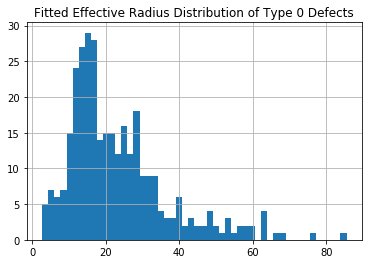

<Figure size 1080x432 with 0 Axes>

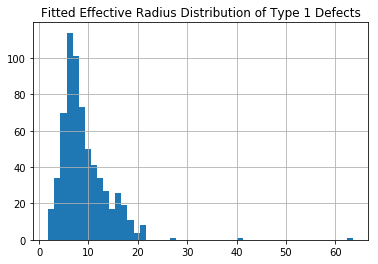

<Figure size 1080x432 with 0 Axes>

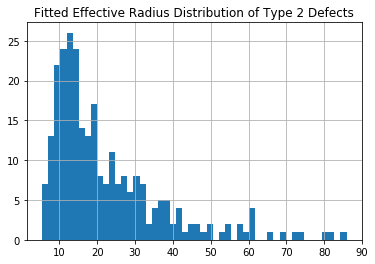

In [16]:
Results=[Reff111,ReffBD,Reff100]

# Plot Size Distribution in each type
for typeInd in range(3):
    DF= pd.DataFrame(columns=['R_eff'])
    
    for (index,val) in enumerate(Results[typeInd]):
        DF.loc[index] = val

    if typeInd == 0:
        print('The average effective radius of 111 is %f'%(np.average(DF['R_eff'])))
    elif typeInd == 1:
        print('The average effective radius of BlackDots is %f'%(np.average(DF['R_eff'])))
    else:
        print('The average effective radius of 100 is %f'%( np.average(DF['R_eff']) ))
    # Ploting    
    histgramFileName = "Fitted_Hist_Effective_Radius_of_" + str(typeInd)
    fig = plt.figure(figsize=(15,6))
    fig, ax = plt.subplots(1,1)
    DF.hist(bins=50, ax=ax)
    plt.title('Fitted Effective Radius Distribution of Type ' + str(typeInd) + ' Defects')
    fig.savefig(histgramFileName,dpi = 300)

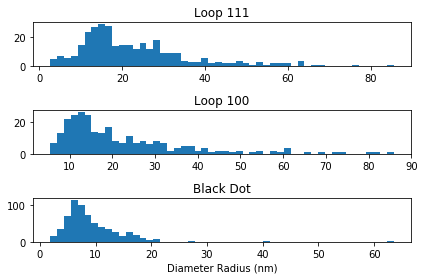

In [17]:
# Show the distribution of Reff
# Plot Radius Distribution
fig, axs = plt.subplots(3, 1, tight_layout=True)

plt.subplot(311)
plt.hist(Reff111, bins=50)
#plt.ylabel("Frequency")
plt.title("Loop 111")
#axs[0].xlabel("Loop Radius (nm)")
plt.subplot(312)
plt.title("Loop 100")
plt.hist(Reff100, bins=50)
#axs[1].ylabel("Frequency")
#axs[1].xlabel("Loop Radius (nm)")
plt.subplot(313)
plt.title("Black Dot")
plt.hist(ReffBD, bins=50)
#axs[2].ylabel("Frequency")
plt.xlabel("Diameter Radius (nm)")
plt.show()
fig.savefig('machine_diameter.png',dpi=300)

In [ ]:
Reff111

In [ ]:
np.median(Reff111)

In [ ]:
Reff111

In [15]:
allDefectsDensity[2]

[1.2494793835901708e-05,
 2.4989587671803416e-05,
 4.2923873248327235e-05,
 0.0005469678953626634,
 0.00019158683881715952,
 5.4144106622240735e-05,
 4.9236207549551826e-05,
 0.0003329369797859691,
 0.00030915576694411415,
 0.0004042806183115339,
 7.13436385255648e-05,
 0.0001070154577883472]